# Model Comparison – ODIR-5K

## Objective
This notebook compares the performance of three deep learning models trained for **multi-label ocular disease classification** using the ODIR-5K dataset:

- **ResNet-50**
- **DenseNet-121**
- **EfficientNet-B0**

The comparison is based on **training histories saved during training**, focusing on:
- Training vs validation accuracy
- Training vs validation loss
- Generalization behavior
- Final model selection

## Section 1 - Import Required Libraries and set paths

In [2]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Training Histories

Training histories were saved as JSON files during model training.
Each file contains:
- Training accuracy
- Validation accuracy
- Training loss
- Validation loss

In [3]:
# Project root
PROJECT_ROOT = Path.cwd().parent
RESULTS_DIR = PROJECT_ROOT / "results"

# Load histories
with open(RESULTS_DIR / "resnet50_history.json") as f:
    resnet_history = json.load(f)

with open(RESULTS_DIR / "densenet121_history.json") as f:
    densenet_history = json.load(f)

with open(RESULTS_DIR / "efficientnet_b0_history.json") as f:
    efficientnet_history = json.load(f)

print("Training histories loaded successfully.")

Training histories loaded successfully.


## Section 2 - Extract Metrics

In [4]:
# ResNet-50
resnet_train_acc = resnet_history["train_accuracy"]
resnet_val_acc = resnet_history["val_accuracy"]
resnet_train_loss = resnet_history["train_loss"]
resnet_val_loss = resnet_history["val_loss"]

# DenseNet-121
densenet_train_acc = densenet_history["train_accuracy"]
densenet_val_acc = densenet_history["val_accuracy"]
densenet_train_loss = densenet_history["train_loss"]
densenet_val_loss = densenet_history["val_loss"]

# EfficientNet-B0
efficientnet_train_acc = efficientnet_history["train_accuracy"]
efficientnet_val_acc = efficientnet_history["val_accuracy"]
efficientnet_train_loss = efficientnet_history["train_loss"]
efficientnet_val_loss = efficientnet_history["val_loss"]

## Section 3 - Comparisons

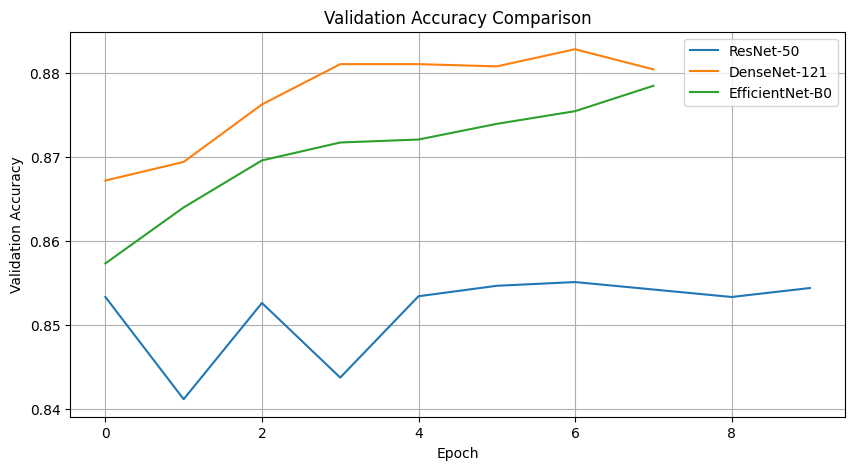

In [5]:
# Plot Validation Accuracy
plt.figure(figsize=(10, 5))

plt.plot(resnet_val_acc, label="ResNet-50")
plt.plot(densenet_val_acc, label="DenseNet-121")
plt.plot(efficientnet_val_acc, label="EfficientNet-B0")

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

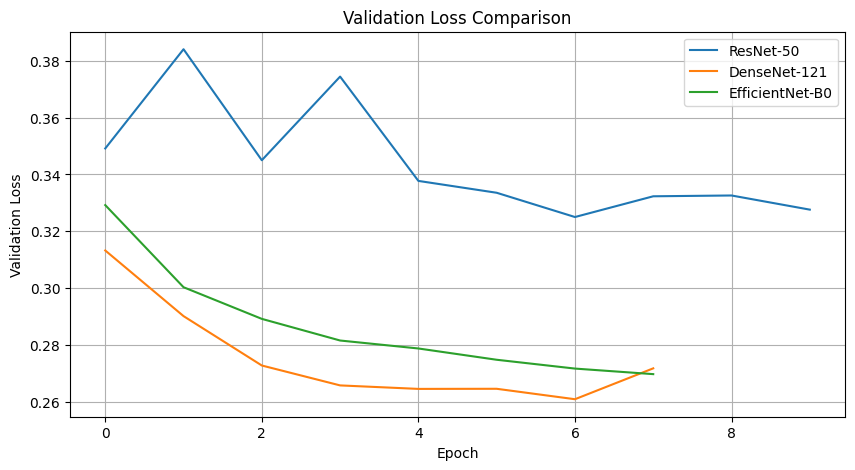

In [6]:
# Plot Validation Loss
plt.figure(figsize=(10, 5))

plt.plot(resnet_val_loss, label="ResNet-50")
plt.plot(densenet_val_loss, label="DenseNet-121")
plt.plot(efficientnet_val_loss, label="EfficientNet-B0")

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

## Section 4 - Training vs Validation Curves (Per Model)

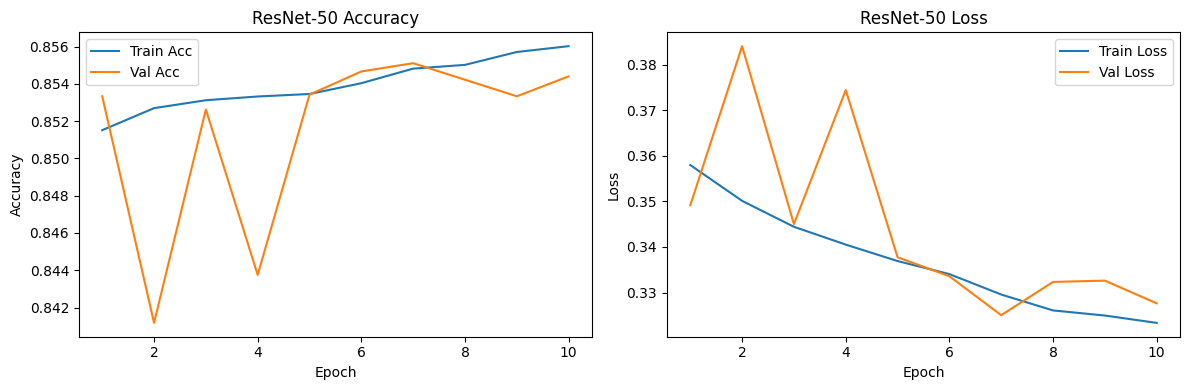

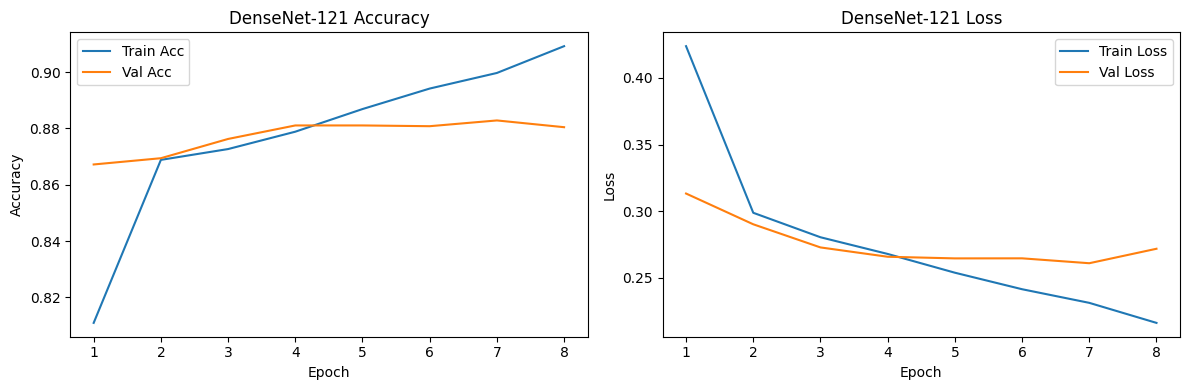

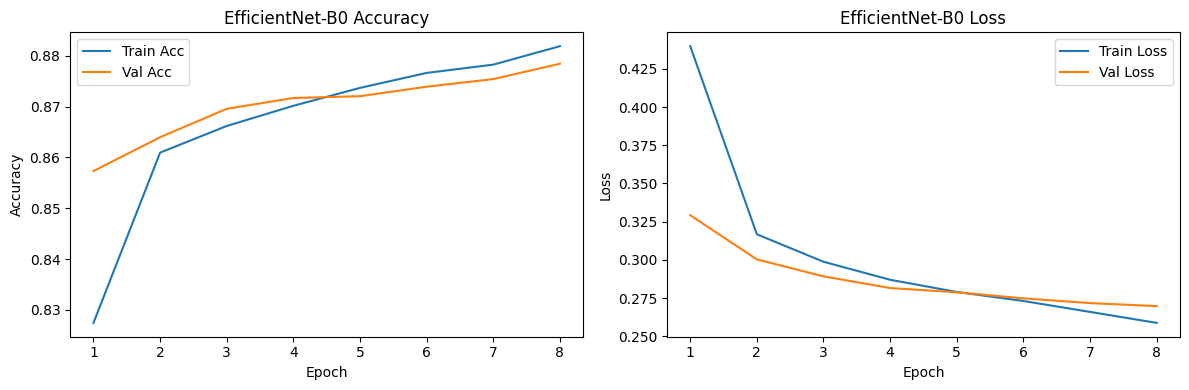

In [7]:
models_data = {
    "ResNet-50": (resnet_train_acc, resnet_val_acc, resnet_train_loss, resnet_val_loss),
    "DenseNet-121": (densenet_train_acc, densenet_val_acc, densenet_train_loss, densenet_val_loss),
    "EfficientNet-B0": (efficientnet_train_acc, efficientnet_val_acc, efficientnet_train_loss, efficientnet_val_loss),
}

for model_name, (tr_acc, va_acc, tr_loss, va_loss) in models_data.items():
    epochs = range(1, len(tr_acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, tr_acc, label="Train Acc")
    plt.plot(epochs, va_acc, label="Val Acc")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, tr_loss, label="Train Loss")
    plt.plot(epochs, va_loss, label="Val Loss")
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

## Interpretation of Results

- **ResNet-50** shows slow and limited improvement in validation accuracy with noticeable fluctuations, indicating weak generalization and sensitivity to overfitting despite continued training loss reduction.

- **DenseNet-121** demonstrates stronger learning capacity with higher training accuracy, but the widening gap between training and validation curves suggests overfitting in later epochs.

- **EfficientNet-B0** exhibits the most stable behavior, with closely aligned training and validation accuracy curves and consistently decreasing validation loss, indicating superior generalization.

## Section 5 - Final Performance Summary

In [8]:
summary_df = pd.DataFrame({
    "Model": ["ResNet-50", "DenseNet-121", "EfficientNet-B0"],
    "Best Validation Accuracy": [
        max(resnet_val_acc),
        max(densenet_val_acc),
        max(efficientnet_val_acc)
    ],
    "Final Validation Loss": [
        resnet_val_loss[-1],
        densenet_val_loss[-1],
        efficientnet_val_loss[-1]
    ],
    "Epochs Trained": [
        len(resnet_val_acc),
        len(densenet_val_acc),
        len(efficientnet_val_acc)
    ]
})

summary_df

,Model,Best Validation Accuracy,Final Validation Loss,Epochs Trained
0,ResNet-50,0.855114,0.327625,10
1,DenseNet-121,0.882812,0.271808,8
2,EfficientNet-B0,0.878462,0.269775,8


## Interpretation of Results

ResNet-50 achieved the lowest best validation accuracy (0.8551) and the highest final validation loss (0.3276), indicating limited generalization and early performance saturation. DenseNet-121 obtained the highest validation accuracy (0.8828) but showed a higher final validation loss (0.2718), suggesting mild overfitting in later epochs. EfficientNet-B0 delivered the most balanced performance, achieving competitive validation accuracy (0.8785) with the lowest final validation loss (0.2698), reflecting superior generalization and stability.

Overall, EfficientNet-B0 is selected as the most robust model for ocular disease recognition on the ODIR-5K dataset.
